In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
colors = sns.color_palette("tab10")

# $H_2$

In [9]:
N = np.array([16, 25, 32])
N_JD = np.array([10, 15, 25, 50, 100, 200])
N_occ = 1
ls = [10, 50, 100, 200]

# FLOPS from standard deflation algorithm
FLOPS_16_def_std = np.array([342211375416, 568173067348, 1143580058914, 926976472646686])
FLOPS_25_def_std = np.array([342211375416, 700038639548, 1345744727612, 2231677492100])
FLOPS_40_def_std = np.array([342211375416, 2231677492100, 1682720097342, 2708275005396])

# FLOPS from mixed deflation algorithm
FLOPS_16_def_new = np.array([234400236504, 481521728456, 812784274768, 11391264068092])
FLOPS_25_def_new = np.array([234400236504, 703770364608, 1201031042256, 1856162550682])
FLOPS_32_def_new = np.array([234400236504, 997572720408, 1017021890128, 21980173348908])

# FLOPS from new implementation of mixed deflation algorithm
FLOPS_16_def_new_impl = np.array([342211375416, 672060980022, 862867465880, 4380870706860])
FLOPS_25_def_new_impl = np.array([342211375416, 927787337668, 1125803501460, 1714328837080])
FLOPS_32_def_new_impl = np.array([342211375416, 968899750776, 1909286762342, 2068221607504])

# Exact diagonalization FLOPS
Exact_diago = 20*(11994)**3

# Block davidson flops
FLOPS_8_BD = np.array([127689696180, 662860224900, 137527449849000, 565044490819600]) 

# Block JD flops
FLOPS_8_JD = np.array([2060487752588, 3229146169698, 4731214902594, 8278518451500, 17761714631160, 36397959365280])

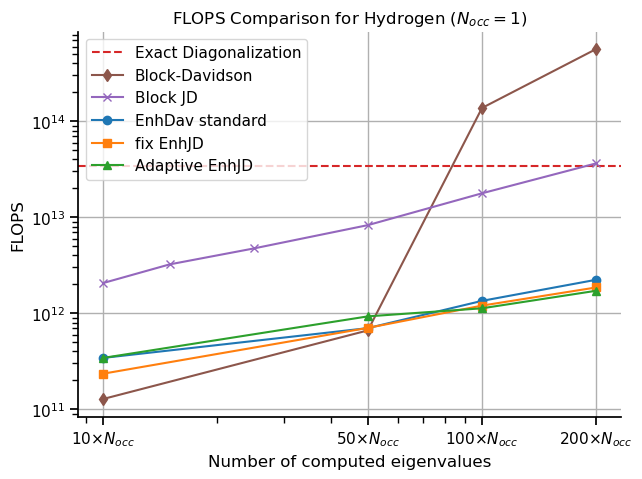

In [10]:
plt.figure(figsize=(7, 5))
plt.axhline(y=Exact_diago, color=colors[3], linestyle='--', label='Exact Diagonalization')
plt.plot(ls, FLOPS_8_BD, marker='d', label='Block-Davidson', color=colors[5])
plt.plot(N_JD, FLOPS_8_JD, marker='x', label='Block JD', color=colors[4])
plt.plot(ls, FLOPS_25_def_std, marker='o', label='EnhDav standard', color=colors[0])
plt.plot(ls, FLOPS_25_def_new, marker='s', label='fix EnhJD', color=colors[1])
plt.plot(ls, FLOPS_25_def_new_impl, marker='^', label='Adaptive EnhJD', color=colors[2])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of computed eigenvalues')
plt.ylabel('FLOPS')

xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.title(r'FLOPS Comparison for Hydrogen (${N_{occ}} = 1$)')
plt.legend()
plt.grid(True)
sns.despine()
# plt.tight_layout()
plt.savefig('FLOPS_comparison_Hydrogen.pdf')
plt.show()


# Formaldehyde

In [11]:
exact_diago = 20*(27643)**3
N_occ = 6
# Computed eigenvalues 
N_JD = np.array([10, 15, 25, 50, 100, 200]) * N_occ
N_block = np.array([10, 15, 17, 19, 21, 23]) * N_occ
N_defl = np.array([10, 50, 100, 200]) * N_occ

# standard (diagonal preconditioner) block davidson 
FLOPS_8 = np.array([4405801238340, 7247024095410, 8251693168158, 12535766414262, 18027893195046, 779828189847582])

# Block jacobi davidson FLOPS 
FLOPS_JD_alpha8 = np.array([63312098850630, 98032487542710, 140025476232930, 280621819242990, 479229805445190, 715969124779980]) # alpha is indifferent in this case, thus we can exclude it

# Deflation algorithm with diagonal preconditioner
FLOPS_25_def = np.array([6415065628956, 27845261539523, 70674758645938, 99597905113222])

# mix JD and diagonal preconditioner (after iteration 20 we switch to JD)
FLOPS_beta25 = np.array([3541251633876, 176523547168970, 151131919263263, 74279594974926])

# improved mix JD and diagonal preconditioner 
FLOPS_beta25_impl1 = np.array([4148365720086, 25426240907522, 38471656220710, 68828434376950]) # counting the iterations where it stagnates before switching
FLOPS_beta25_impl2 = np.array([4148365720086, 20064592804272, 44225936796369, 114574873417791]) # use cosine to check convergence

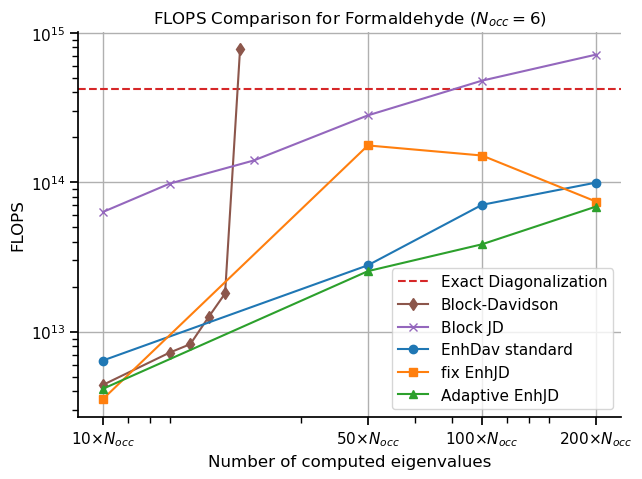

In [12]:
plt.figure(figsize=(7, 5))
plt.axhline(y=exact_diago, color=colors[3], linestyle='--', label='Exact Diagonalization')
plt.plot(N_block, FLOPS_8, marker='d', label='Block-Davidson', color=colors[5])
plt.plot(N_JD, FLOPS_JD_alpha8, marker='x', label='Block JD', color=colors[4])
plt.plot(N_defl, FLOPS_25_def, marker='o', label='EnhDav standard', color=colors[0])
plt.plot(N_defl, FLOPS_beta25, marker='s', label='fix EnhJD', color=colors[1])
plt.plot(N_defl, FLOPS_beta25_impl1, marker='^', label='Adaptive EnhJD', color=colors[2])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of computed eigenvalues')
plt.ylabel('FLOPS')

xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.title(r'FLOPS Comparison for Formaldehyde (${N_{occ}} = 6$)')
plt.legend()
plt.grid(True)
sns.despine()
plt.savefig('FLOPS_comparison_Formaldehyde.pdf')
plt.show()


# Uracile

In [13]:
N_occ = 21
N_virt = 32416

N_block = np.array([10, 15, 20]) * N_occ
N = np.array([10, 50, 100, 200]) * N_occ
N_JD = np.array([10, 15, 25, 50]) * N_occ

exact_diago = 20*(N_virt)**3

# standard (diagonal preconditioner) davidson
FLOPS_8 = np.array([22282635345600, 41232042450900, 2019798514366080])

# Block JD --> not ready yet
FLOPS_defl_JD_alpha8 = np.array([358260150836832, 547093405159164, 768148128306372, 1239198232118208])

# Deflation algorithm with diagonal preconditioner
FLOPS_25_def1 = np.array([21704563957828, 120351328951380, 331796334339744, 988466468666572])

# mix JD and diagonal preconditioner
FLOPS_25_defmix = np.array([16789885791684, 550048536421856, 402515274556556, 477869930787196])

# improved mix JD and diagonal preconditioner
FLOPS_25_defmix_impl1 = np.array([15508435058200, 100593030078592, 187532896506336, 463388011832224]) # counting the iterations where it stagnates before switching
FLOPS_25_defmix_impl2 = np.array([15609452585176, 109355619711764, 279655523607104, 770880929107904]) # use cosine to check convergence

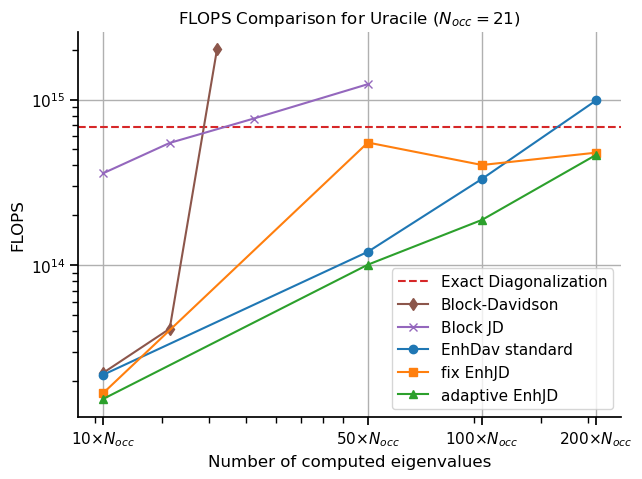

In [14]:
plt.figure(figsize=(7, 5))
plt.axhline(y=exact_diago, color=colors[3], linestyle='--', label='Exact Diagonalization')
plt.plot(N_block, FLOPS_8, marker='d', label='Block-Davidson', color=colors[5])
plt.plot(N_JD, FLOPS_defl_JD_alpha8, marker='x', label='Block JD', color=colors[4])
plt.plot(N, FLOPS_25_def1, marker='o', label='EnhDav standard', color=colors[0])
plt.plot(N, FLOPS_25_defmix, marker='s', label='fix EnhJD', color=colors[1])
plt.plot(N, FLOPS_25_defmix_impl1, marker='^', label='adaptive EnhJD', color=colors[2])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of computed eigenvalues')
plt.ylabel('FLOPS')

xticks = np.array([10, 50, 100, 200]) * N_occ
# Create labels: one line for nev, second line for multiplier
xtick_labels = [f"{mult}×$N_{{occ}}$" for nev, mult in zip(xticks, [10, 50, 100, 200])]
plt.xticks(xticks, xtick_labels)
plt.title(r'FLOPS Comparison for Uracile (${N_{occ}} = 21$)')
plt.legend()
plt.grid(True)
sns.despine()
plt.savefig('FLOPS_comparison_Uracile.pdf')
plt.show()
